In [57]:
import pickle
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from sklearn import datasets, linear_model

import pandas as pd
import itertools

# settings for plots
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

In [2]:
temperature, precp, snow = pickle.load(open('../data/weather_data.p', 'rb'))

In [3]:
precp = map(lambda e: float(e[:4]),precp)

In [4]:
for i, e in enumerate(snow):     
    if e == 'No data.':
        snow[i] = 0.0
    else:
        snow[i] = float(e.split(' ')[0])

In [5]:
temperature = np.asarray(temperature)
precp = np.asarray(precp)
snow = np.asarray(snow)

In [6]:
data = np.empty((365, 3))

In [7]:
data[:, 0] = temperature
data[:, 1] = precp
data[:, 2] = snow

In [8]:
data

array([[ 31.2 ,   0.  ,   0.  ],
       [ 38.6 ,   0.  ,   0.  ],
       [ 35.2 ,   0.  ,   0.  ],
       ..., 
       [ 40.2 ,   0.37,   0.  ],
       [ 41.8 ,   0.13,   0.  ],
       [ 47.  ,   0.17,   0.  ]])

In [9]:
def load_data_2015():    
    trip_data = []
    for i in range(1, 13):
        n = "0" + `i` if i < 10 else str(i)
        trip_data.append(pd.read_csv("../data/trip-data/2015" + n + "-citibike-tripdata.csv"))
    return trip_data

In [10]:
trip_data = load_data_2015()

In [45]:
def get_daily_traffic(month_data):
    month = month_data['starttime']
    
    date = []
    for i in month:
        d = i.split(' ')[0]
        vals = map(lambda v: v if len(v) > 1 else '0' + v,  d.split('/'))
        date.append('/'.join(vals))
        
    month_data['date'] = pd.Series(np.asarray(date), index=month_data.index)
    
    daily_traffic = month_data.groupby("date").size().to_dict()
    sorted_keys = sorted(daily_traffic.keys())
    
    return np.asarray([daily_traffic[key] for key in sorted_keys])

In [46]:
y = get_daily_traffic(trip_data[0])

In [47]:
y

array([ 5317, 11304,  4478,  7849, 14506,  8739,  9646,  8779,  7930,
        6109,  7467,  8645, 12797, 13086, 14075, 13843,  7491,  1795,
       10710, 16129, 15234, 15864, 15737,  4814,  9379,  4141,  1214,
        5401,  8870,  9015,  5188])

In [49]:
y = []
for month_data in trip_data:
    daily_traffic = get_daily_traffic(month_data)
    y.extend(daily_traffic)    

In [50]:
len(y)

365

In [51]:
regr = linear_model.LinearRegression()

In [52]:
regr.fit(data, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
regr.coef_

array([  501.36744541, -5566.32423471, -1120.71603691])

In [55]:
np.mean((regr.predict(data) - y) ** 2)

62219883.655622669

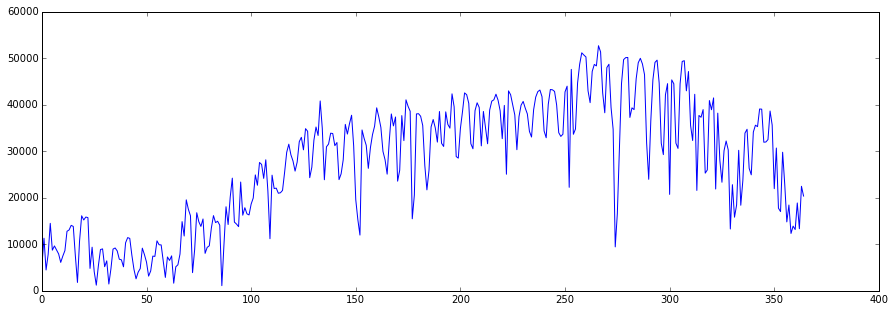

In [58]:
plt.plot(y)

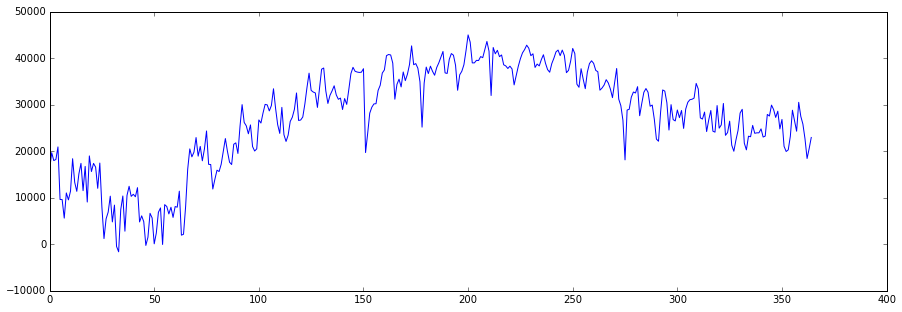

In [59]:
plt.plot(regr.predict(data))